In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt 
import networkx as nx 

In [2]:
data=pd.read_csv(r"influence_data.csv",header=0)
PR=pd.read_csv(r"music_influence_rate.csv",header=0)
PR=PR.T
test=data['follower_id']
test1=data['follower_main_genre']
df1 = pd.concat([test,test1],axis=1,ignore_index=False)

In [3]:
df1.drop_duplicates(subset=['follower_id'],keep="first",inplace=True)
df1.set_index(['follower_id'],inplace=True)
df1

,follower_main_genre
follower_id,
74,Pop/Rock
335,Pop/Rock
441,Pop/Rock
589,Pop/Rock
1098,Pop/Rock
...,...
3639618,Pop/Rock
3659356,Pop/Rock
3661296,Electronic


In [4]:
genre=df1.T

In [5]:
influencer_data=data['influencer_name']
follower_data=data['follower_name']
id_data=data['follower_id']
inf_id_data=data['influencer_id']
follower_main_genre=data['follower_main_genre']
from collections import Counter
list1 = influencer_data.values.tolist()
list2 = follower_data.values.tolist()
list3 = id_data.values.tolist()
list4 = inf_id_data.values.tolist()
result1 = Counter(list1)
result2 = Counter(list3)
result3 = Counter(list4)
dic1 = sorted(result1.items(),key= lambda x:x[1],reverse=True)[:10]
namelist=[]
for i in range(10):
    namelist.append(dic1[i][0])

c=dict(result2)
d=dict(result3)
allname=list(c.keys())
infName=list(d.keys())

In [14]:
G = nx.Graph([])
for i in range(1,20000):
    if influencer_data[i] in namelist:
        G.add_edge(influencer_data[i],follower_data[i])#添加边,起点为x，终点为y

In [10]:
PR

,759491,25462,66915,71209,91438,113823,132710,208582,378288,397880,...,2766592,1599476,2365087,2659130,3006966,588887,2814183,261309,2518003,2896351
PR,0.013675,0.012038,35.807104,0.42669,0.011171,0.002954,0.000641,0.009696,0.086912,0.053662,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


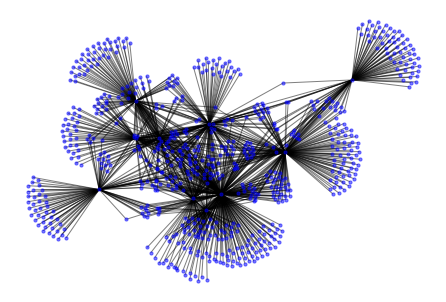

In [15]:
#nx.draw(G,pos = nx.random_layout(G),node_color = 'b',style='solid',edge_color = 'r',with_labels = False,font_size =18,node_size =20)
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b",alpha=0.5, node_size=10, with_labels=False)


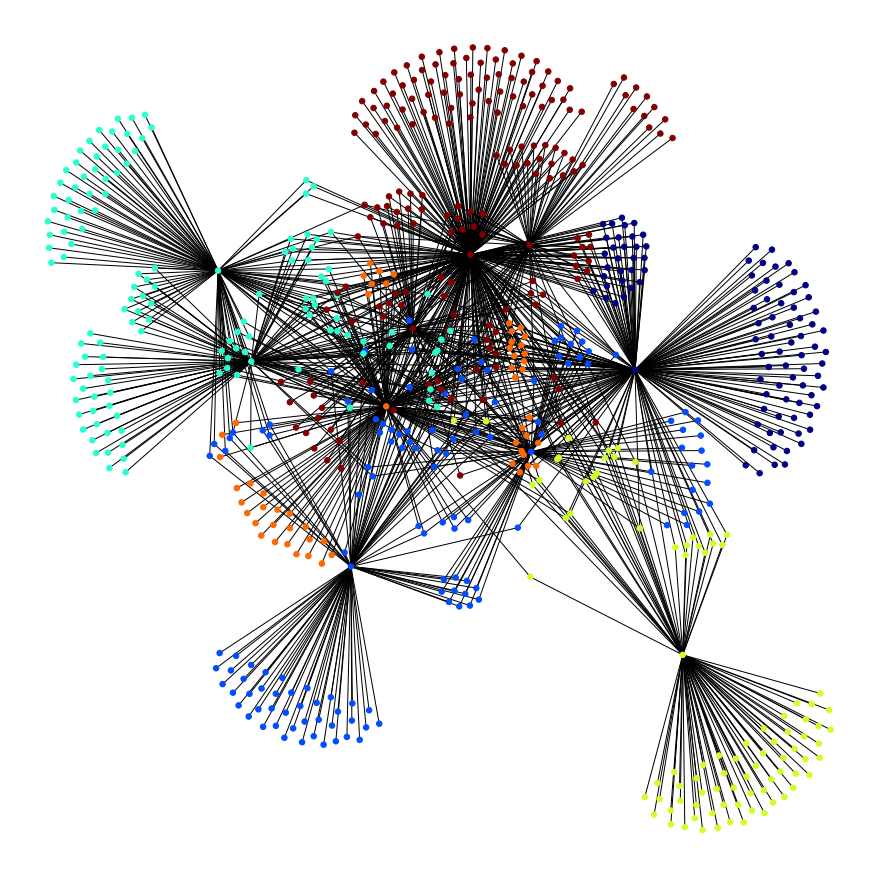

In [16]:
import community

part = community.best_partition(G)
values = [part.get(node) for node in G.nodes()]
plt.figure(3,figsize=(12,12)) 
nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False)

In [59]:
main_genre=data['influencer_main_genre'].tolist()
main_genre=list(set(main_genre))#音乐种类


In [60]:
import random
def randomcolor():
    colorArr = ['1','2','3','4','5','6','7','8','9','a','b','c','d','e','f']
    color = ""
    for i in range(6):
        color += colorArr[random.randint(0,14)]
    return "#"+color


In [61]:
colorDic={}
for i in range(0,20):
    c=randomcolor()
    colorDic[main_genre[i]]=c

In [8]:
def randomposition_x():
    ranpos_x=random.randint(-1000,1000)
    return ranpos_x

def randomposition_y():
    ranpos_y=random.randint(-1000,1000)
    return ranpos_y

In [28]:
nodeDic={}


In [29]:
list4=[]
for i in range(0,100):
    creatNode(i)
    list4.append(nodeDic)

In [ ]:
edge={}


In [1]:
# 随机坐标
#生成随机数，浮点类型
def generate_position(n):
#    n = 10
    for i in range(n):
        x = round(random.uniform(-2000, 2000), 5)  #一定范围内的随机数，范围可变
        y = round(random.uniform(-2000, 2000), 5)  #控制随机数的精度round(数值，精度)
    return x, y

In [172]:
def create_json():
    # 自定义节点
    address_dict = {"nodes":[], "edges":[]}
    node_dict = {
          "color": "",
          "label": "",
          "attributes": {},
          "y": None,
          "x": None,
          "id": "",
          "size": None
        }
    edge_dict = {
          "sourceID": "",
          "attributes": {},
          "targetID": "",
          "size": None
        }
    for i in range(0,5026):
        u=genre[allname[i]].tolist()[0]
        node_dict[r"color"]=colorDic[u]
        node_dict[r"label"]=nameT[allname[i]].tolist()[0]
        node_dict[r"attributes"]={}
        x, y = generate_position(1)
        node_dict[r"y"]=y
        node_dict[r"x"]=x
        node_dict[r"id"]=str(allname[i])
        if allname[i] in prnamelist:
            if PR[allname[i]].tolist()[0] > 2:
                node_dict[r"size"]=PR[allname[i]].tolist()[0]
            else:
                node_dict[r"size"]=1.5
        if allname[i] not in prnamelist:
            node_dict[r"size"]=0
        tmp_node = copy.deepcopy(node_dict)
        address_dict[r"nodes"].append(tmp_node)
   
    inf=inf_id_data.tolist()
    fow=id_data.tolist()
    
    for i in range(0,3774):
        if inf[i] in infName:
            if fow[i] in infName:
                edge_dict["sourceID"]=str(inf[i])
                edge_dict["attributes"]={}
                edge_dict["targetID"]=str(fow[i])
                edge_dict["size"]=1
                tmp_edge = copy.deepcopy(edge_dict)
                address_dict["edges"].append(tmp_edge)

    return address_dict

In [173]:
import json
import copy
address_dict = create_json()
with open("write_json.json", "w", encoding='utf-8') as f:
    # json.dump(dict_, f)  # 写为一行
    json.dump(address_dict, f, indent=2, ensure_ascii=False)  # 写为多行

In [ ]:
def creatNode(i):
    node_dict[r"color"]=colorDic['Vocal']
    node_dict[r"label"]=allname[i]
    node_dict[r"attributes"]={}
    x, y = generate_position(1)
    node_dict[r"y"]=y
    node_dict[r"x"]=x
    node_dict[r"id"]=str(list3[i])
    node_dict[r"size"]=PR[list3[i]].tolist()[0]
    tmp_node = copy.deepcopy(node_dict)
    address_dict[r"nodes"].append(tmp_node)

In [ ]:
def creatEdge(f,t):
    edge_dict["sourceID"]=f
    edge_dict["attributes"]={}
    edge_dict["targetID"]=t
    edge_dict["size"]=1
    tmp_edge = copy.deepcopy(edge_dict)
    address_dict["edges"].append(tmp_edge)

In [96]:
genre[allname[i]]

follower_id,3426,3426
follower_main_genre,R&B;,R&B;


In [151]:
PR1=pd.read_csv(r"PRdata.csv",header=0)
prnamelist=PR1['ID'].tolist()

In [163]:
name=pd.read_csv(r"namelist.csv",header=0)
name.drop_duplicates(subset=['follower_id'],keep="first",inplace=True)
name.set_index(['follower_id'],inplace=True)
nameT=name.T

In [168]:
nameT[74].tolist()[0]

'Special Duties'

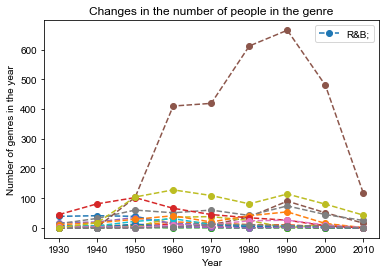

In [2]:
data=pd.read_csv(r"timeline.csv",header=0)
data.drop_duplicates(subset=['influencer_id'],keep="first",inplace=True)
tag=data.drop(['influencer_id','influencer_name'],axis=1)
v=[1 for index in range(len(tag))]
tag['num']=v

genreCharc=pd.read_csv(r"genreCharctis.csv",header=0)
x=[]
for i in range(1,15):
    x.append(i)

genreCharc.drop(['artist_id'],axis=1,inplace=True)
usedata=genreCharc.T
type_time_data=pd.read_csv(r"timetype.csv",header=0)
ids=tag['influencer_main_genre'].tolist()
ids = list(set(ids))
for i in range(0,20):
    if ids[i] != 'Unknown':
        plt.plot(type_time_data['Year'].tolist(),type_time_data[ids[i]].tolist() ,'--o') 
        plt.legend([ids[i]])
plt.style.use('seaborn')
#轴的标签
plt.xlabel('Year')
plt.ylabel('Number of genres in the year')
#轴的标题
plt.title('Changes in the number of people in the genre')
plt.show()

In [45]:
df=pd.read_csv(r"year_distance.csv",header=0)
x=df['distance'].tolist()
y=df['year'].tolist()

In [42]:

import pyecharts.options as opts
from pyecharts.charts import Line
from pyecharts.faker import Faker

c = (
    Line()
    .add_xaxis(se)
    .add_yaxis("Characteristic gap", x)
    .set_global_opts(title_opts=opts.TitleOpts(title="Changes in musical characteristics of the era")),label_opts=opts.LabelOpts(is_show=False),
    .render("line_base.html")
)

SyntaxError: invalid syntax (<ipython-input-42-6ddc043aac74>, line 9)

In [46]:
se=[]
for i in range(1922,2021):
    se.append(str(i))

In [51]:
import pyecharts.options as opts
from pyecharts.charts import Line

line=(
    Line()
    .set_global_opts(
        tooltip_opts=opts.TooltipOpts(is_show=False),
        xaxis_opts=opts.AxisOpts(type_="category"),
        yaxis_opts=opts.AxisOpts(
            type_="value",
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
    )
    .add_xaxis(xaxis_data=se)
    .add_yaxis(
        series_name="Changes in musical characteristics of the era",
        y_axis=x,
        symbol="emptyCircle",
        is_symbol_show=True,
        label_opts=opts.LabelOpts(is_show=False),
    )
)
line.render_notebook()